##Import Module

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



##Load the Dataset

In [6]:
column_names = [
    'Status_of_existing_checking_account', 'Duration_in_month', 'Credit_history', 'Purpose',
    'Credit_amount', 'Savings_account_bonds', 'Present_employment_since', 'Installment_rate_in_percentage_of_disposable_income',
    'Personal_status_and_sex', 'Other_debtors_guarantors', 'Present_residence_since', 'Property',
    'Age_in_years', 'Other_installment_plans', 'Housing', 'Number_of_existing_credits_at_this_bank',
    'Job', 'Number_of_people_being_liable_to_provide_maintenance_for', 'Telephone', 'Foreign_worker', 'Credit_risk'
]
file_path = '/content/german.data'
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)

In [7]:
file_path = '/content/german.data'
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)

In [8]:
data.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


##Encode Categorical variables

In [9]:
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])


##Split the data into training and testing sets

In [10]:
X = data.drop('Credit_risk', axis=1)
y = data['Credit_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Build the Random Forest model

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

##Make predictions

In [12]:
y_pred = rf.predict(X_test)


##Evaluate the model

In [13]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.805
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.93      0.87       141
           2       0.75      0.51      0.61        59

    accuracy                           0.81       200
   macro avg       0.78      0.72      0.74       200
weighted avg       0.80      0.81      0.79       200

Confusion Matrix:
[[131  10]
 [ 29  30]]


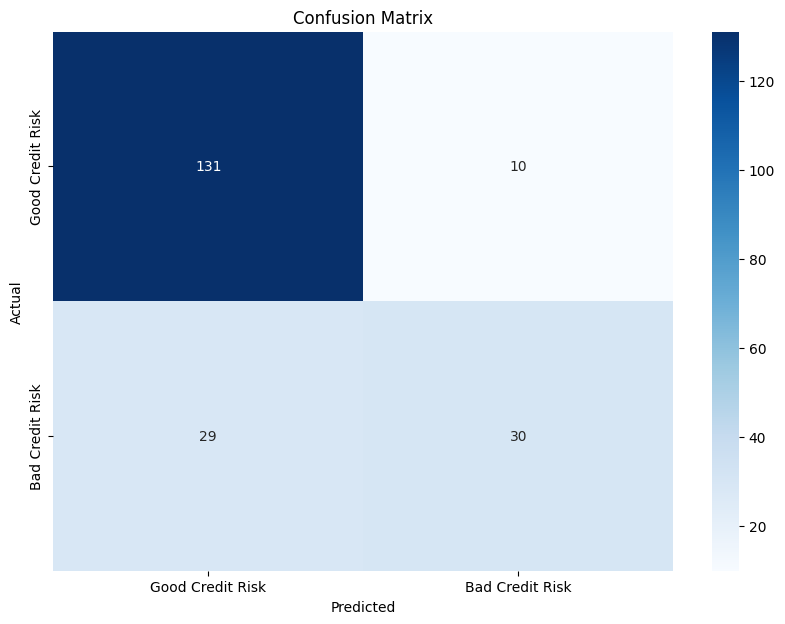

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good Credit Risk', 'Bad Credit Risk'], yticklabels=['Good Credit Risk', 'Bad Credit Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
